In [1]:
import os,sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
datapath = '/mnt/shared_b/data/hydro_simulations/data/'
# print(os.listdir(path))

ncfiles = list([])
for file in os.listdir(datapath):
    if file.endswith(".nc"):
        ncfiles.append(file)
print(len(ncfiles))
ncfiles_all = ncfiles.copy()

13798


(array([1.3784e+04, 3.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.66371002e+01, 4.86704373e+05, 9.73392110e+05, 1.46007985e+06,
        1.94676758e+06, 2.43345532e+06, 2.92014305e+06, 3.40683079e+06,
        3.89351853e+06, 4.38020626e+06, 4.86689400e+06]),
 <BarContainer object of 10 artists>)

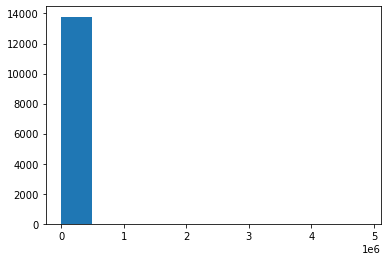

In [3]:
## check max value for first 8 slices
img_size = 320
dep = 8
maxvals = np.zeros(len(ncfiles))
for fileexp_ind in range(len(ncfiles)):
# val = []
# for fileexp_ind in range(len(ncfiles)):
    filename = ncfiles[fileexp_ind]
    sim = xr.open_dataarray(datapath+filename)
# val.append(np.max(np.array(sim)[:dep,:,:].flatten()))
    sim.close()
    dyn   = np.zeros((1,1,dep,img_size,img_size))            # load one sample, show it
    for t in range(dep):
        dyn[0,0,t,:,:] = sim.isel(t=t)[:img_size,:img_size].values
    maxvals[fileexp_ind] = np.max( dyn.flatten() )
plt.hist(maxvals)

(array([1.3784e+04, 3.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.66371002e+01, 4.86704373e+05, 9.73392110e+05, 1.46007985e+06,
        1.94676758e+06, 2.43345532e+06, 2.92014305e+06, 3.40683079e+06,
        3.89351853e+06, 4.38020626e+06, 4.86689400e+06]),
 <BarContainer object of 10 artists>)

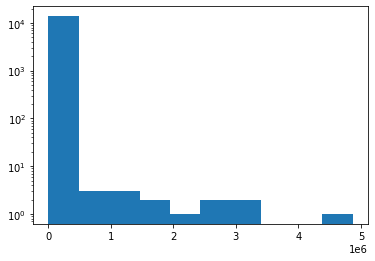

In [5]:
plt.hist(maxvals,log=True)

In [1]:
np.sum(maxvals>50)

NameError: name 'np' is not defined

In [2]:
filename1 = ncfiles[0]
# filename1 = 'data_ta_2d_profile2.vel1.mgrg02.s10.cs1.cv0.ptwg02.nc'
# filename2 = 'data_ta_2d_profile2.vel5.mgrg03.s10.cs1.cv0.ptwg00.nc'
sim1 = xr.open_dataarray(path+filename1)
# sim2 = xr.open_dataarray(path+filename2)

In [3]:
ncfiles[0]

'data_ta_2d_profile0.vel0.mgrg00.s10.cs0.cv0.ptwg00.nc'

In [5]:
count = 0
for filename2 in ncfiles:
    sim2 = xr.open_dataarray(path+filename2)
    if np.sum(np.abs(sim1.isel(t=-1).values - sim2.isel(t=-1).values)) != 0:
        count += 1
print(count)

13797


In [ ]:
np.sum(sim1.isel(t=-1).values - sim2.isel(t=-1).values)

In [ ]:
sim1.isel(t=7).values

In [ ]:
len(ncfiles)

In [ ]:
sim['t'][-1]
# every image ends with time 4100

In [ ]:
sim.isel(t=-1)

### filter identical data

In [8]:
filecount = 1
while filecount < len(ncfiles):
    ncfiles_cp = ncfiles.copy()
    filename1 = ncfiles[filecount]
    sim1 = xr.open_dataarray(path+filename1)
    for filename2 in ncfiles_cp:
        if filename2 != filename1:
            sim2 = xr.open_dataarray(path+filename2)
        if np.sum(np.abs(sim1.isel(t=-1).values - sim2.isel(t=-1).values)) == 0:
            ncfiles.remove(filename)
    filecount += 1
print(len(ncfiles))
    

Exception ignored in: <function CachingFileManager.__del__ at 0x7f87dc76e170>
Traceback (most recent call last):
  File "/opt/anaconda/envs/pyvenv/lib/python3.7/site-packages/xarray/backends/file_manager.py", line 244, in __del__
    self.close(needs_lock=False)
  File "/opt/anaconda/envs/pyvenv/lib/python3.7/site-packages/xarray/backends/file_manager.py", line 222, in close
    file.close()
KeyboardInterrupt: 


KeyboardInterrupt: 

### utils

In [ ]:
def get_rho(filename,Nx,Ny,Nt):
    rho=np.zeros((Nx,Ny,Nt)) # Initializing the density array
    sim = xr.open_dataarray(filename)  # Reading .nc xarray file 
    
    for i in range(Nt):
        a=sim.isel(t=i);
        a=a[:350,:350] # Cropping the image to 350x350
        ar=np.concatenate((np.flipud(a),a), axis=0) # Flipping array to get the right part
        al=np.concatenate((np.flipud(np.fliplr(a)),np.fliplr(a)), axis=0) # Flipping array to get the left part
        # Combining to form a full circle from a quarter image and resizing the 700x700 to 200x200 image
        rho[:,:,i]=resize(np.concatenate((al,ar), axis=1), (Nx, Ny), anti_aliasing=True)

    return torch.tensor(rho,dtype=torch.float)
